1.**What is a Decision Tree, and how does it work?**

A Decision Tree is a supervised machine learning algorithm used for both classification and regression tasks. It models decisions and their possible consequences as a tree-like structure consisting of nodes:

Root Node: Represents the entire dataset, which is then split into subsets.

Internal Nodes: Represent tests on attributes.

Branches: Represent outcomes of the test.

Leaf Nodes: Represent the final output (class label or continuous value).

How it works:

Starting from the root node, the tree splits the dataset based on the attribute that best separates the classes (or predicts the target).

Splitting continues recursively until stopping criteria are met (pure nodes, max depth, min samples, etc.).

During prediction, the input traverses the tree from the root to a leaf based on attribute tests, outputting the leaf node’s label or value.

2.**What are impurity measures in Decision Trees?**

Impurity measures quantify how mixed or "impure" a dataset is regarding the target variable at a node.

In classification, impurity measures help decide how to split data to create the purest possible subsets (ideally with samples of a single class).

Common impurity measures:

Gini Impurity

Entropy

Classification Error

Impurity is zero when all samples belong to one class.

3. **What is the mathematical formula for Gini Impurity?**
For a node
𝑡

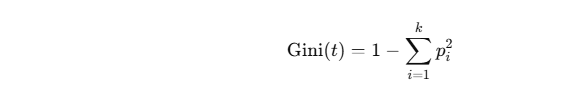

It measures the probability of incorrectly classifying a randomly chosen element from the node if it was labeled randomly according to the class distribution.

4. **What is the mathematical formula for Entropy?**

Entropy for node
𝑡

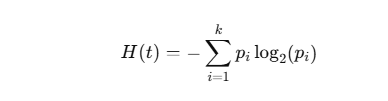

Entropy measures the disorder or impurity — zero entropy means the node is pure.

5. **What is Information Gain, and how is it used in Decision Trees?**

Information Gain (IG) measures the reduction in entropy after a dataset is split on an attribute. It helps choose the best attribute to split at each node.


For attribute

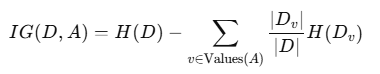

The attribute with the highest IG is chosen for splitting.

6. **What is the difference between Gini Impurity and Entropy?**

Aspect	Gini Impurity	Entropy
Range	0 (pure) to 0.5 (max impurity for 2 classes)	0 (pure) to 1 (max impurity for 2 classes)
Interpretation	Probability of misclassification	Disorder or randomness in data
Computational cost	Less computationally intensive	Slightly more expensive due to log
Usage	Often preferred for classification due to efficiency	Popular in information theory and classification

Both give similar results but may differ in small splits.

7. **What is the mathematical explanation behind Decision Trees?**

Mathematically, a decision tree tries to partition the feature space into disjoint regions

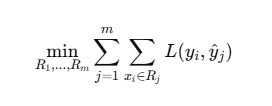
  
  corresponding to leaf nodes such that:

For classification, the goal is to minimize impurity in each region.

For regression, minimize the sum of squared errors in each region.

The tree grows by recursively choosing splits that optimize an impurity reduction criterion.

8. **What is Pre-Pruning in Decision Trees?**

Pre-Pruning (Early Stopping):

The process of stopping tree growth early before it perfectly classifies the training data.

Criteria to stop splitting can include:

Minimum samples per node.

Maximum tree depth.

Minimum impurity decrease threshold.

Goal: avoid overfitting by limiting tree complexity early.

9. **What is Post-Pruning in Decision Trees?**

Post-Pruning (Pruning after training):

Grow the tree fully first (potentially overfitting).

Then remove branches/nodes that do not provide a significant benefit based on a validation set or complexity penalty.

Methods include:

Reduced error pruning.

Cost complexity pruning (e.g., weakest link pruning).

Goal: improve generalization by simplifying the fully grown tree.

10. **What is the difference between Pre-Pruning and Post-Pruning?**

Aspect	Pre-Pruning	Post-Pruning
When applied	During tree construction	After fully grown tree
Risk of underfitting	Higher risk (may stop too early)	Lower risk (tree fully grown first)
Complexity control	Limits tree size early	Prunes tree to reduce size
Computational cost	Less costly (stops early)	More costly (needs full tree + pruning)
Common usage	Used to avoid large trees	Often leads to better accuracy

11. **What is a Decision Tree Regressor?**

A Decision Tree Regressor predicts continuous values instead of classes:

Instead of impurity, it uses variance reduction or mean squared error (MSE) to split nodes.

At each leaf, the predicted value is usually the mean of the target values of samples in that leaf.

The tree is constructed to minimize prediction error on the training set.

12. **What are the advantages and disadvantages of Decision Trees?**

Advantages:

Easy to understand and interpret.

Requires little data preprocessing (no scaling needed).

Can handle both numerical and categorical data.

Can model nonlinear relationships.

Fast inference/prediction.

Feature importance can be extracted.

Disadvantages:

Prone to overfitting without pruning.

Small changes in data can result in different trees (high variance).

Can be biased toward features with more levels.

Poor generalization on small datasets.

Not great for extrapolation in regression.

13. **How does a Decision Tree handle missing values?**

Some implementations handle missing values by:

Using surrogate splits (alternative features to split when the main split is missing).

Assigning the sample to the child node with the majority of data or based on probability.

Imputing missing values before training.

Handling missing values varies by library (e.g., CART in sklearn does not handle missing values natively).

14. **How does a Decision Tree handle categorical features?**

Categorical features can be handled by:

Splitting based on equality checks (e.g., Feature == category).

Grouping categories to maximize purity.

Some algorithms convert categorical features to dummy/one-hot variables.

Some advanced algorithms handle categorical splits directly by evaluating all possible partitions.

15. **What are some real-world applications of Decision Trees?**

Healthcare: Diagnosing diseases based on symptoms.

Finance: Credit scoring and risk assessment.

Marketing: Customer segmentation and churn prediction.

Manufacturing: Fault detection and quality control.

Retail: Product recommendation and inventory management.

Natural Language Processing: Text classification.

Fraud detection: Detecting suspicious activities.



In [47]:
# Import necessary libraries
from sklearn.datasets import load_iris, load_wine, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, mean_squared_error, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load datasets
iris = load_iris()
housing = fetch_california_housing()

In [49]:
# Split data for classification and regression tasks
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, random_state=42)

In [50]:
# 1. Default Decision Tree Classifier
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, clf1.predict(X_test))

In [52]:
# 2. Decision Tree using Gini
clf2 = DecisionTreeClassifier(criterion='gini')
clf2.fit(X_train, y_train)
importances_gini = clf2.feature_importances_

In [53]:
# 3. Decision Tree using Entropy
clf3 = DecisionTreeClassifier(criterion='entropy')
clf3.fit(X_train, y_train)
acc3 = accuracy_score(y_test, clf3.predict(X_test))

In [54]:
# 4. Decision Tree Regressor (Full Tree)
reg1 = DecisionTreeRegressor()
reg1.fit(X_train_h, y_train_h)
mse1 = mean_squared_error(y_test_h, reg1.predict(X_test_h))

In [55]:
# 5. DOT format for Graphviz visualization
dot_data = export_graphviz(
    clf1, out_file=None, feature_names=iris.feature_names,
    class_names=iris.target_names, filled=True
)

In [56]:
# 6. Decision Tree with max_depth=3
clf_depth3 = DecisionTreeClassifier(max_depth=3)
clf_depth3.fit(X_train, y_train)
acc_depth3 = accuracy_score(y_test, clf_depth3.predict(X_test))

In [57]:

# 7. Decision Tree with min_samples_split=5
clf_split5 = DecisionTreeClassifier(min_samples_split=5)
clf_split5.fit(X_train, y_train)
acc_split5 = accuracy_score(y_test, clf_split5.predict(X_test))

In [58]:

# 8. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, iris.target, random_state=42)
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_s, y_train_s)
acc_scaled = accuracy_score(y_test_s, clf_scaled.predict(X_test_s))

In [59]:

# 9. One-vs-Rest Multiclass
ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)
acc_ovr = accuracy_score(y_test, ovr_clf.predict(X_test))

In [60]:
# 10. Feature Importance (Default Tree)
importances_default = clf1.feature_importances_

In [61]:
# 11. Regressor with max_depth=5
reg_depth5 = DecisionTreeRegressor(max_depth=5)
reg_depth5.fit(X_train_h, y_train_h)
mse_depth5 = mean_squared_error(y_test_h, reg_depth5.predict(X_test_h))

In [62]:
# 12. Cost Complexity Pruning (first 5 alpha values)
path = clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:5]
ccp_accuracies = []
for alpha in ccp_alphas:
    pruned_clf = DecisionTreeClassifier(ccp_alpha=alpha)
    pruned_clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, pruned_clf.predict(X_test))
    ccp_accuracies.append(acc)

In [63]:
# 13. Precision, Recall, F1-Score
y_pred = clf1.predict(X_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [64]:
# 14. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [65]:

# 15. GridSearchCV for hyperparameter tuning
params = {'max_depth': [1, 2, 3, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_score = grid.best_score_

In [66]:
# Print results
print("1. Accuracy (Default Tree):", acc1)
print("2. Feature Importances (Gini):", importances_gini)
print("3. Accuracy (Entropy Criterion):", acc3)
print("4. MSE (Housing - Full Tree):", mse1)
print("5. DOT Format Tree (Graphviz - preview):", dot_data[:200])
print("6. Accuracy (Max Depth = 3):", acc_depth3)
print("7. Accuracy (min_samples_split=5):", acc_split5)
print("8. Accuracy (with Feature Scaling):", acc_scaled)
print("9. Accuracy (One-vs-Rest Strategy):", acc_ovr)
print("10. Feature Importances (Default Tree):", importances_default)
print("11. MSE (Housing - Depth=5):", mse_depth5)
print("12. Accuracy (CCP Pruning - First 5 α values):", ccp_accuracies)
print("13. Precision:", precision)
print("14. Recall:", recall)
print("15. F1-Score:", f1)
print("16. Confusion Matrix:\n", conf_matrix)
print("17. Best Params (GridSearchCV):", best_params)
print("18. Best Accuracy (GridSearchCV):", best_score)

1. Accuracy (Default Tree): 1.0
2. Feature Importances (Gini): [0.         0.01787567 0.41581891 0.56630542]
3. Accuracy (Entropy Criterion): 0.9736842105263158
4. MSE (Housing - Full Tree): 0.5235300983647481
5. DOT Format Tree (Graphviz - preview): digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 
6. Accuracy (Max Depth = 3): 1.0
7. Accuracy (min_samples_split=5): 1.0
8. Accuracy (with Feature Scaling): 1.0
9. Accuracy (One-vs-Rest Strategy): 1.0
10. Feature Importances (Default Tree): [0.01787567 0.         0.89974604 0.08237829]
11. MSE (Housing - Depth=5): 0.526799989691142
12. Accuracy (CCP Pruning - First 5 α values): [1.0, 1.0, 1.0, 1.0, 0.9736842105263158]
13. Precision: 1.0
14. Recall: 1.0
15. F1-Score: 1.0
16. Confusion Matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
17. Best Params (GridSearchCV): {'max_depth': None, 'min_sampl